In [1]:
#### OM. ######

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
from sklearn.metrics import confusion_matrix

In [131]:
import pandas as pd
data =pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

There is no null object found in the dataset.

In [132]:
data.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [5]:
data.ID.value_counts()

2361343     1
41448027    1
4221528     1
36440660    1
2241107     1
           ..
9321901     1
42087852    1
3935659     1
12559205    1
3805186     1
Name: ID, Length: 67463, dtype: int64

we have to drop this feild as its of no use with 67463 different IDs.

In [133]:
data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [134]:
data.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [135]:
data['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [136]:
data['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [137]:
a=data['Loan Title'].value_counts()

In [138]:
len(a)

109

Application type of Joint is very less in number.

In [139]:
data['Loan Title'] = data['Loan Title'].str[:3]

In [140]:
data['Loan Title'] = data['Loan Title'].str.upper()

In [141]:
len(data['Loan Title'].value_counts())

31


## Feature Importance

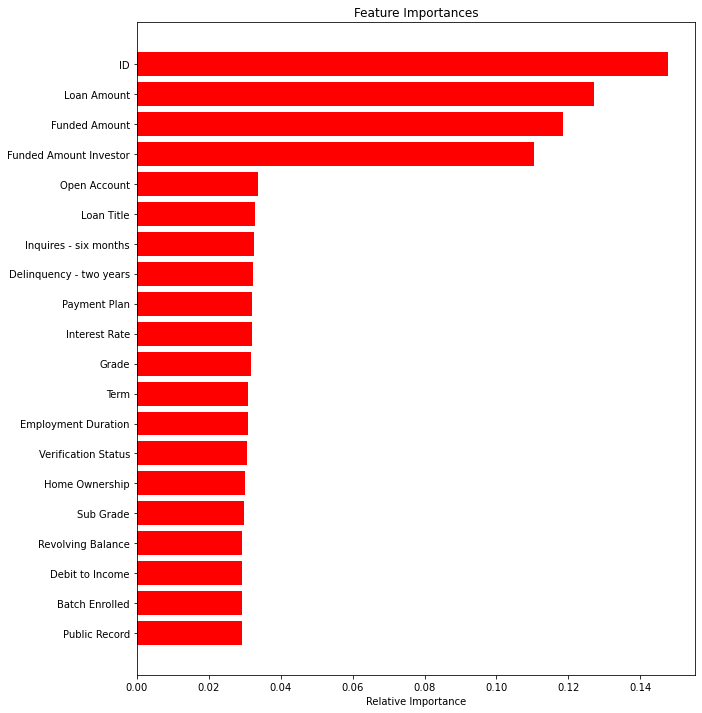

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 4 informative features
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=4,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
features = data.columns
importances = forest.feature_importances_
indices = (np.argsort(importances))
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [143]:
y = data['Loan Status']

In [144]:
data.drop(['Loan Status'], axis = 1, inplace = True) 
data.drop(['ID'], axis=1, inplace=True)

In [145]:
data.shape

(67463, 33)

In [23]:
data.drop(['ID'], axis=1, inplace=True)

In [146]:
# splitting the data 
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.3, random_state=42)
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [147]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(x_train.shape,x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(y_train.shape,y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(x_cv.shape,y_cv.shape))

the shape of x_train data,(37779, 33) and shape of x_test data (20239, 33):
the shape of y_train data,(37779,) and shape of y_test data (20239,):
the shape of x_cv data,(9445, 33) and shape of y_cv data (9445,):


In [148]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [149]:
x_train_real_loan_amount = SS.fit_transform(x_train[['Loan Amount']])
x_test_real_loan_amount = SS.fit_transform(x_test[['Loan Amount']])
x_cv_real_loan_amount = SS.fit_transform(x_cv[['Loan Amount']])

In [150]:
x_train_real_funded_amount = SS.fit_transform(x_train[['Funded Amount']])
x_test_real_funded_amount = SS.fit_transform(x_test[['Funded Amount']])
x_cv_real_funded_amount = SS.fit_transform(x_cv[['Funded Amount']])

In [151]:
x_train_real_investor = SS.fit_transform(x_train[['Funded Amount Investor']])
x_test_real_investor = SS.fit_transform(x_test[['Funded Amount Investor']])
x_cv_real_investor = SS.fit_transform(x_cv[['Funded Amount Investor']])

In [152]:
x_train_real_term = SS.fit_transform(x_train[['Term']])
x_test_real_term = SS.fit_transform(x_test[['Term']])
x_cv_real_term = SS.fit_transform(x_cv[['Term']])

In [240]:
x_train_real_term[:50]

array([[ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [ 0.24822318],
       [-0.05480867],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [-6.72150919],
       [-0.05480867],
       [ 0.24822318],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [-0.05480867],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [ 0.24822318],
       [-0.05480867],
       [-0

In [153]:
x_train_real_rate = SS.fit_transform(x_train[['Interest Rate']])
x_test_real_rate = SS.fit_transform(x_test[['Interest Rate']])
x_cv_real_rate = SS.fit_transform(x_cv[['Interest Rate']])

In [154]:
x_train_real_home = SS.fit_transform(x_train[['Home Ownership']])
x_test_real_home = SS.fit_transform(x_test[['Home Ownership']])
x_cv_real_home = SS.fit_transform(x_cv[['Home Ownership']])

In [155]:
x_train_real_di = SS.fit_transform(x_train[['Debit to Income']])
x_test_real_di = SS.fit_transform(x_test[['Debit to Income']])
x_cv_real_di = SS.fit_transform(x_cv[['Debit to Income']])

In [156]:
x_train_real_dtwoyears = SS.fit_transform(x_train[['Delinquency - two years']])
x_test_real_dtwoyears = SS.fit_transform(x_test[['Delinquency - two years']])
x_cv_real_dtwoyears = SS.fit_transform(x_cv[['Delinquency - two years']])

In [157]:
x_train_real_ismonths = SS.fit_transform(x_train[['Inquires - six months']])
x_test_real_ismonths = SS.fit_transform(x_test[['Inquires - six months']])
x_cv_real_ismonths = SS.fit_transform(x_cv[['Inquires - six months']])

In [158]:
x_train_real_oaccount = SS.fit_transform(x_train[['Open Account']])
x_test_real_oaccount = SS.fit_transform(x_test[['Open Account']])
x_cv_real_oaccount = SS.fit_transform(x_cv[['Open Account']])

In [159]:
x_train_real_precord = SS.fit_transform(x_train[['Public Record']])
x_test_real_precord = SS.fit_transform(x_test[['Public Record']])
x_cv_real_precord = SS.fit_transform(x_cv[['Public Record']])

In [160]:
x_train_real_rbalance = SS.fit_transform(x_train[['Revolving Balance']])
x_test_real_rbalance = SS.fit_transform(x_test[['Revolving Balance']])
x_cv_real_rbalance = SS.fit_transform(x_cv[['Revolving Balance']])

In [161]:
x_train_real_rutilities = SS.fit_transform(x_train[['Revolving Utilities']])
x_test_real_rutilities = SS.fit_transform(x_test[['Revolving Utilities']])
x_cv_real_rutilities = SS.fit_transform(x_cv[['Revolving Utilities']])

In [162]:
x_train_real_taccount = SS.fit_transform(x_train[['Total Accounts']])
x_test_real_taccount = SS.fit_transform(x_test[['Total Accounts']])
x_cv_real_taccount = SS.fit_transform(x_cv[['Total Accounts']])

In [163]:
x_train_real_trinterest = SS.fit_transform(x_train[['Total Received Interest']])
x_test_real_trinterest = SS.fit_transform(x_test[['Total Received Interest']])
x_cv_real_trinterest = SS.fit_transform(x_cv[['Total Received Interest']])

In [164]:
x_train_real_trlfee = SS.fit_transform(x_train[['Total Received Late Fee']])
x_test_real_trlfee = SS.fit_transform(x_test[['Total Received Late Fee']])
x_cv_real_trlfee = SS.fit_transform(x_cv[['Total Received Late Fee']])

In [165]:
x_train_real_recover = SS.fit_transform(x_train[['Recoveries']])
x_test_real_recover = SS.fit_transform(x_test[['Recoveries']])
x_cv_real_recover = SS.fit_transform(x_cv[['Recoveries']])

In [166]:
x_train_real_crfee = SS.fit_transform(x_train[['Collection Recovery Fee']])
x_test_real_crfee = SS.fit_transform(x_test[['Collection Recovery Fee']])
x_cv_real_crfee = SS.fit_transform(x_cv[['Collection Recovery Fee']])

In [167]:
x_train_real_medical = SS.fit_transform(x_train[['Collection 12 months Medical']])
x_test_real_medical = SS.fit_transform(x_test[['Collection 12 months Medical']])
x_cv_real_medical = SS.fit_transform(x_cv[['Collection 12 months Medical']])

In [168]:
x_train_real_pay = SS.fit_transform(x_train[['Last week Pay']])
x_test_real_pay = SS.fit_transform(x_test[['Last week Pay']])
x_cv_real_pay = SS.fit_transform(x_cv[['Last week Pay']])

In [169]:
x_train_real_ad = SS.fit_transform(x_train[['Accounts Delinquent']])
x_test_real_ad = SS.fit_transform(x_test[['Accounts Delinquent']])
x_cv_real_ad = SS.fit_transform(x_cv[['Accounts Delinquent']])

In [170]:
x_train_real_tcamount = SS.fit_transform(x_train[['Total Collection Amount']])
x_test_real_tcamount = SS.fit_transform(x_test[['Total Collection Amount']])
x_cv_real_tcamount = SS.fit_transform(x_cv[['Total Collection Amount']])

In [171]:
x_train_real_tcbalance = SS.fit_transform(x_train[['Total Current Balance']])
x_test_real_tcbalance = SS.fit_transform(x_test[['Total Current Balance']])
x_cv_real_tcbalance = SS.fit_transform(x_cv[['Total Current Balance']])

In [172]:
x_train_real_trcl = SS.fit_transform(x_train[['Total Revolving Credit Limit']])
x_test_real_trcl = SS.fit_transform(x_test[['Total Revolving Credit Limit']])
x_cv_real_trcl = SS.fit_transform(x_cv[['Total Revolving Credit Limit']])

In [173]:
import numpy as np

In [174]:
real_x_train = np.concatenate((x_train_real_loan_amount,x_train_real_funded_amount,x_train_real_investor,x_train_real_term,
                                x_train_real_rate,x_train_real_home,x_train_real_di,x_train_real_dtwoyears,x_train_real_ismonths,
                                x_train_real_oaccount,x_train_real_precord,x_train_real_rbalance,x_train_real_rutilities,
                                x_train_real_taccount,x_train_real_trinterest,x_train_real_trlfee,x_train_real_recover,
                                x_train_real_crfee,x_train_real_medical,x_train_real_pay,x_train_real_ad,x_train_real_tcamount,
                                x_train_real_tcbalance,x_train_real_trcl),axis = 1)

In [175]:
real_x_test = np.concatenate((x_test_real_loan_amount,x_test_real_funded_amount,x_test_real_investor,x_test_real_term,
x_test_real_rate,x_test_real_home,x_test_real_di,x_test_real_dtwoyears,x_test_real_ismonths,
x_test_real_oaccount,x_test_real_precord,x_test_real_rbalance,x_test_real_rutilities,
x_test_real_taccount,x_test_real_trinterest,x_test_real_trlfee,x_test_real_recover,
x_test_real_crfee,x_test_real_medical,x_test_real_pay,x_test_real_ad,x_test_real_tcamount,
x_test_real_tcbalance,x_test_real_trcl),axis=1)

In [176]:
real_x_cv = np.concatenate((x_cv_real_loan_amount,x_cv_real_funded_amount,x_cv_real_investor,x_cv_real_term,
x_cv_real_rate,x_cv_real_home,x_cv_real_di,x_cv_real_dtwoyears,x_cv_real_ismonths,
x_cv_real_oaccount,x_cv_real_precord,x_cv_real_rbalance,x_cv_real_rutilities,
x_cv_real_taccount,x_cv_real_trinterest,x_cv_real_trlfee,x_cv_real_recover,
x_cv_real_crfee,x_cv_real_medical,x_cv_real_pay,x_cv_real_ad,x_cv_real_tcamount,x_cv_real_tcbalance,
x_cv_real_trcl),axis=1)

In [177]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

### onehot encoding od cat feature

In [ ]:
ohe.fit(x_train['Batch Enrolled'].values.reshape(-1,1))
batch_train = ohe.transform(x_train['Batch Enrolled'].values.reshape(-1,1))
batch_test = ohe.transform(x_test['Batch Enrolled'].values.reshape(-1,1))
batch_cv = ohe.transform(x_cv['Batch Enrolled'].values.reshape(-1,1))

ohe.fit(x_train['Grade'].values.reshape(-1,1))
grade_train = ohe.transform(x_train['Grade'].values.reshape(-1,1))
grade_test = ohe.transform(x_test['Grade'].values.reshape(-1,1))
grade_cv = ohe.transform(x_cv['Grade'].values.reshape(-1,1))

ohe.fit(x_train['Sub Grade'].values.reshape(-1,1))
subgrade_train = ohe.transform(x_train['Sub Grade'].values.reshape(-1,1))
subgrade_test = ohe.transform(x_test['Sub Grade'].values.reshape(-1,1))
subgrade_cv = ohe.transform(x_cv['Sub Grade'].values.reshape(-1,1))

ohe.fit(x_train['Employment Duration'].values.reshape(-1,1))
employment_train = ohe.transform(x_train['Employment Duration'].values.reshape(-1,1))
employment_test = ohe.transform(x_test['Employment Duration'].values.reshape(-1,1))
employment_cv = ohe.transform(x_cv['Employment Duration'].values.reshape(-1,1))

ohe.fit(x_train['Verification Status'].values.reshape(-1,1))
vstatus_train = ohe.transform(x_train['Verification Status'].values.reshape(-1,1))
vstatus_test = ohe.transform(x_test['Verification Status'].values.reshape(-1,1))
vstatus_cv = ohe.transform(x_cv['Verification Status'].values.reshape(-1,1))

ohe.fit(x_train['Payment Plan'].values.reshape(-1,1))
pplan_train = ohe.transform(x_train['Payment Plan'].values.reshape(-1,1))
pplan_test = ohe.transform(x_test['Payment Plan'].values.reshape(-1,1))
pplan_cv = ohe.transform(x_cv['Payment Plan'].values.reshape(-1,1))

ohe.fit(x_train['Loan Title'].values.reshape(-1,1))
title_train = ohe.transform(x_train['Loan Title'].values.reshape(-1,1))
title_test = ohe.transform(x_test['Loan Title'].values.reshape(-1,1))
title_cv = ohe.transform(x_cv['Loan Title'].values.reshape(-1,1))

ohe.fit(x_train['Initial List Status'].values.reshape(-1,1))
ilstatus_train = ohe.transform(x_train['Initial List Status'].values.reshape(-1,1))
ilstatus_test = ohe.transform(x_test['Initial List Status'].values.reshape(-1,1))
ilstatus_cv = ohe.transform(x_cv['Initial List Status'].values.reshape(-1,1))

ohe.fit(x_train['Application Type'].values.reshape(-1,1))
type_train = ohe.transform(x_train['Application Type'].values.reshape(-1,1))
type_test = ohe.transform(x_test['Application Type'].values.reshape(-1,1))
type_cv = ohe.transform(x_cv['Application Type'].values.reshape(-1,1))

from scipy.sparse import hstack

cat_x_train = hstack([batch_train,grade_train,subgrade_train,employment_train,vstatus_train,pplan_train,title_train,ilstatus_train,type_train]).tocsr()
cat_x_test = hstack([batch_test,grade_test,subgrade_test,employment_test,vstatus_test,pplan_test,title_test,ilstatus_test,type_test]).tocsr()
cat_x_cv = hstack([batch_cv,grade_cv,subgrade_cv,employment_cv,vstatus_cv,pplan_cv,title_cv,ilstatus_cv,type_cv]).tocsr()
                     
                     

ohe_x_train = hstack([cat_x_train,real_x_train])
ohe_x_test = hstack([cat_x_test,real_x_test])
ohe_x_cv = hstack([cat_x_cv,real_x_cv])

# Models 

using onehot encoding

## Applying KNN Brute Force Algorithm

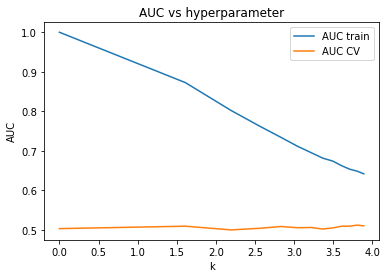

optimal alpha for which auc is maximum :  45


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

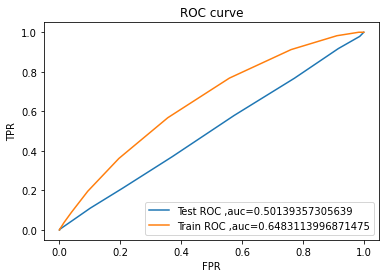

AUC on Test data is 0.50139357305639
AUC on Train data is 0.6483113996871475
---------------------------


NameError: name 'sns' is not defined

<Figure size 432x288 with 0 Axes>

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1,tpr1,thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [94]:
results1 = pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 49",0.6483,0.5013]
results1.loc[0] = new

### XGBoost

In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

optimal n_estimators 100
optimal max_depth 1


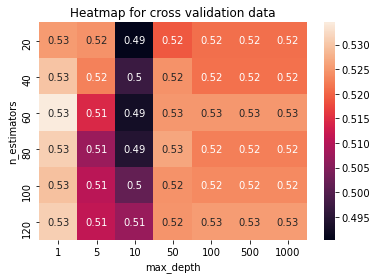

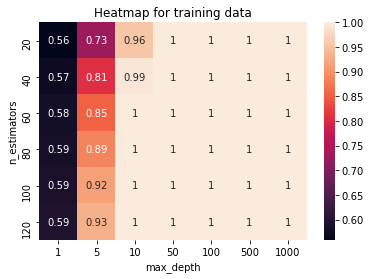

In [96]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

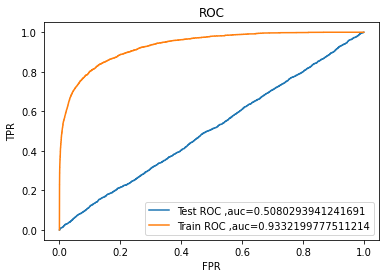

AUC on Test data is 0.5080293941241691
AUC on Train data is 0.9332199777511214
---------------------------


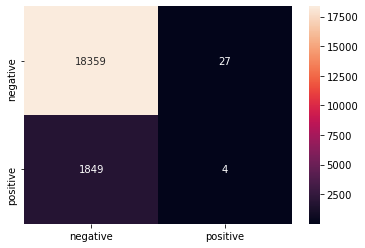

In [126]:
#training our model for max_depth=50,min_samples_split=500
clf = XGBClassifier(max_depth = 5,n_estimators = 120)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

## Ramdom Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 60
optimal max_depth 5


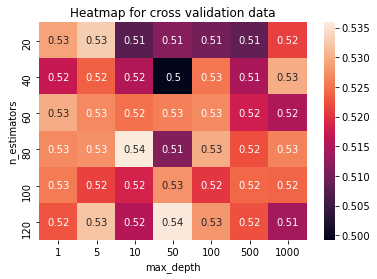

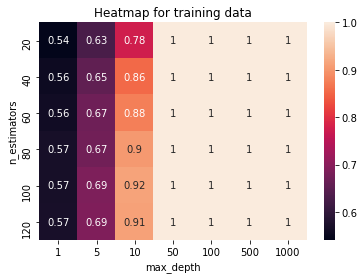

In [103]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

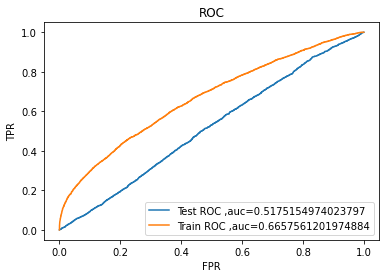

AUC on Test data is 0.5175154974023797
AUC on Train data is 0.6657561201974884
---------------------------


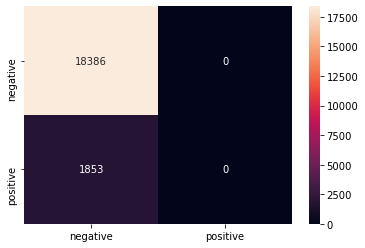

In [107]:
#training our model for max_depth=1000,n_estimators = 120
clf = RandomForestClassifier(max_depth = 5,n_estimators = 60)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()


print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

### logistics regression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

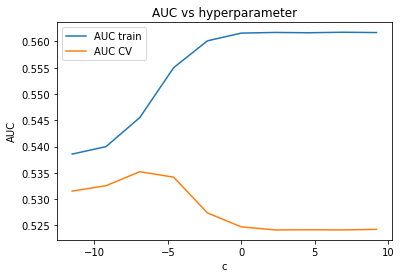

optimal c for which auc is maximum :  0.001


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

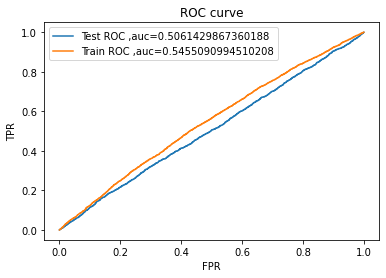

AUC on Test data is 0.5061429867360188
AUC on Train data is 0.5455090994510208
---------------------------


<Figure size 432x288 with 0 Axes>

In [191]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )

In [110]:
import pickle

filename = 'ohe_XGB.sav'
pickle.dump(clf, open(filename, 'wb'))

## response encoding

In [200]:
test_data = pd.read_csv("test.csv")
test_data['Loan Title'] = test_data['Loan Title'].str[:3]
test_data['Loan Title'] = test_data['Loan Title'].str.upper()
    
test_data.drop(['Loan Status'], axis = 1, inplace = True) 
test_data.drop(['ID'], axis=1, inplace=True)

In [197]:
def get_gv_fea_dict(alpha, feature, df):   
    value_count = x_train[feature].value_counts()

    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,3):
            cls_cnt = x_train.loc[(y_train==k) & (x_train[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = x_train[feature].value_counts()
    
    
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

In [201]:
#response-coding of the job feature
# alpha is used for laplace smoothing
alpha = 1
# train job feature
train_batch_feature_responseCoding = np.array(get_gv_feature(alpha, 'Batch Enrolled', x_train))
# test job feature
test_batch_feature_responseCoding = np.array(get_gv_feature(alpha, 'Batch Enrolled', x_test))
# cross validation job feature
cv_batch_feature_responseCoding = np.array(get_gv_feature(alpha, 'Batch Enrolled', x_cv))
test_data_batch_response = np.array(get_gv_feature(alpha, 'Batch Enrolled', test_data))

In [202]:
alpha = 1
# train job feature
train_Grade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Grade', x_train))
# test job feature
test_Grade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Grade', x_test))
# cross validation job feature
cv_Grade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Grade', x_cv))
test_Grade_batch_response = np.array(get_gv_feature(alpha, 'Grade', test_data))

In [203]:
alpha = 1
# train job feature
train_sGrade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Sub Grade', x_train))
# test job feature
test_sGrade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Sub Grade', x_test))
# cross validation job feature
cv_sGrade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Sub Grade', x_cv))
test_sGrade_batch_response = np.array(get_gv_feature(alpha, 'Sub Grade', test_data))

In [204]:
alpha = 1
# train job feature
train_Employment_feature_responseCoding = np.array(get_gv_feature(alpha, 'Employment Duration', x_train))
# test job feature
test_Employment_feature_responseCoding = np.array(get_gv_feature(alpha, 'Employment Duration', x_test))
# cross validation job feature
cv_Employment_feature_responseCoding = np.array(get_gv_feature(alpha, 'Employment Duration', x_cv))
test_Employment_batch_response = np.array(get_gv_feature(alpha, 'Employment Duration', test_data))

In [205]:
alpha = 1
# train job feature
train_VStatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Verification Status', x_train))
# test job feature
test_VStatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Verification Status', x_test))
# cross validation job feature
cv_VStatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Verification Status', x_cv))
test_VStatus_batch_response = np.array(get_gv_feature(alpha, 'Verification Status', test_data))

In [206]:
alpha = 1
# train job feature
train_PPlan_feature_responseCoding = np.array(get_gv_feature(alpha, 'Payment Plan', x_train))
# test job feature
test_PPlan_feature_responseCoding = np.array(get_gv_feature(alpha, 'Payment Plan', x_test))
# cross validation job feature
cv_PPlan_feature_responseCoding = np.array(get_gv_feature(alpha, 'Payment Plan', x_cv))
test_PPlan_batch_response = np.array(get_gv_feature(alpha, 'Payment Plan', test_data))

In [207]:
alpha = 1
# train job feature
train_title_feature_responseCoding = np.array(get_gv_feature(alpha, 'Loan Title', x_train))
# test job feature
test_title_feature_responseCoding = np.array(get_gv_feature(alpha, 'Loan Title', x_test))
# cross validation job feature
cv_title_feature_responseCoding = np.array(get_gv_feature(alpha, 'Loan Title', x_cv))
test_title_batch_response = np.array(get_gv_feature(alpha, 'Loan Title', test_data))

In [208]:
alpha = 1
# train job feature
train_ilstatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Initial List Status', x_train))
# test job feature
test_ilstatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Initial List Status', x_test))
# cross validation job feature
cv_ilstatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Initial List Status', x_cv))
test_ilstatus_batch_response = np.array(get_gv_feature(alpha, 'Initial List Status', test_data))

In [209]:
alpha = 1
# train job feature
train_atype_feature_responseCoding = np.array(get_gv_feature(alpha, 'Application Type', x_train))
# test job feature
test_atype_feature_responseCoding = np.array(get_gv_feature(alpha, 'Application Type', x_test))
# cross validation job feature
cv_atype_feature_responseCoding = np.array(get_gv_feature(alpha, 'Application Type', x_cv))
test_atype_batch_response = np.array(get_gv_feature(alpha, 'Application Type', test_data))

In [211]:
cat_response_x_train = np.concatenate((train_batch_feature_responseCoding,train_Grade_feature_responseCoding,train_sGrade_feature_responseCoding,
train_Employment_feature_responseCoding,train_VStatus_feature_responseCoding,train_PPlan_feature_responseCoding,
train_title_feature_responseCoding,train_ilstatus_feature_responseCoding,train_atype_feature_responseCoding),axis=1)

In [212]:
cat_response_x_test = np.concatenate((test_batch_feature_responseCoding,test_Grade_feature_responseCoding,test_sGrade_feature_responseCoding,
test_Employment_feature_responseCoding,test_VStatus_feature_responseCoding,test_PPlan_feature_responseCoding,
test_title_feature_responseCoding,test_ilstatus_feature_responseCoding,test_atype_feature_responseCoding),axis=1)

In [213]:
cat_response_x_cv = np.concatenate((cv_batch_feature_responseCoding,cv_Grade_feature_responseCoding,cv_sGrade_feature_responseCoding,
cv_Employment_feature_responseCoding,cv_VStatus_feature_responseCoding,cv_PPlan_feature_responseCoding,
cv_title_feature_responseCoding,cv_ilstatus_feature_responseCoding,cv_atype_feature_responseCoding),axis=1)

In [214]:
cat_response_x_textcsv = np.concatenate((test_data_batch_response,test_Grade_batch_response,test_sGrade_batch_response,test_Employment_batch_response,
test_VStatus_batch_response,test_PPlan_batch_response,test_title_batch_response,test_ilstatus_batch_response,
test_atype_batch_response),axis=1)

cat_response_x_textcsv.shape

In [220]:
rc_x_train = np.concatenate((cat_response_x_train,real_x_train),axis = 1)
rc_x_test = np.concatenate((cat_response_x_test,real_x_test),axis = 1)
rc_x_cv = np.concatenate((cat_response_x_cv,real_x_cv),axis = 1)
rc_x_testcsv = np.concatenate((cat_response_x_textcsv,real_y_for_test),axis = 1)

In [221]:
rc_x_train.shape

(37779, 42)

## LR with L2

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

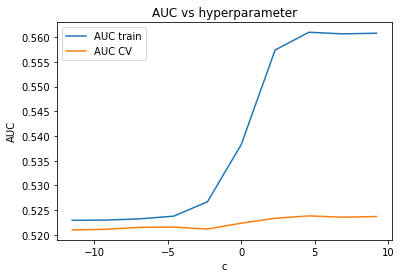

optimal c for which auc is maximum :  100


In [222]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


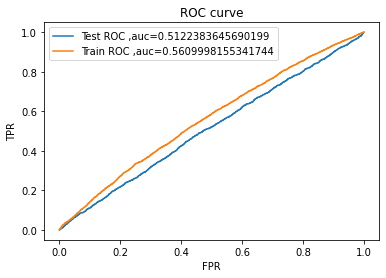

AUC on Test data is 0.5122383645690199
AUC on Train data is 0.5609998155341744
---------------------------


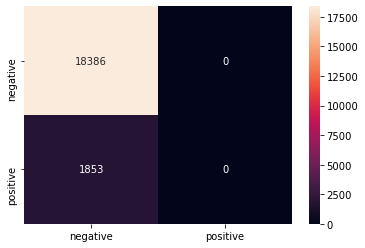

In [223]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

### XGboost

In [224]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

optimal n_estimators 120
optimal max_depth 1


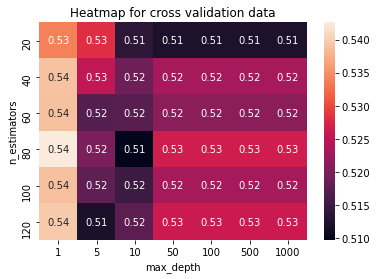

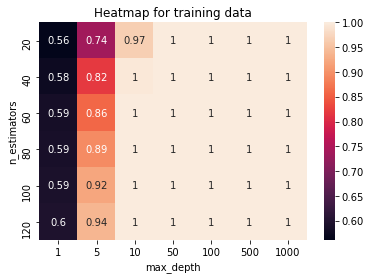

In [225]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

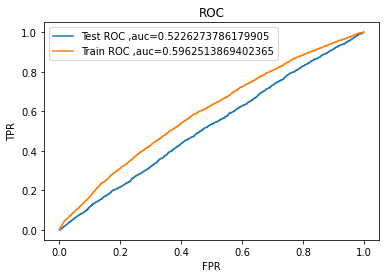

AUC on Test data is 0.5226273786179905
AUC on Train data is 0.5962513869402365
---------------------------


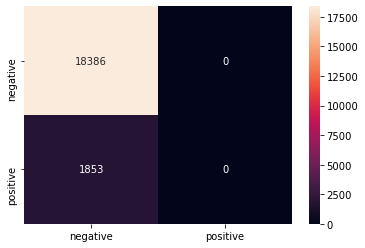

In [226]:
#training our model for max_depth=,min_samples_split=500
clf = XGBClassifier(max_depth = 1,n_estimators = 120)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")



### randomforest

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 100
optimal max_depth 5


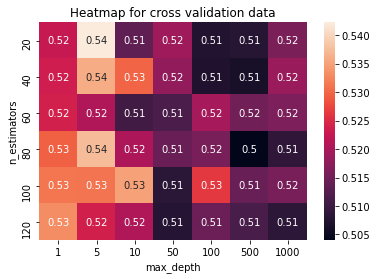

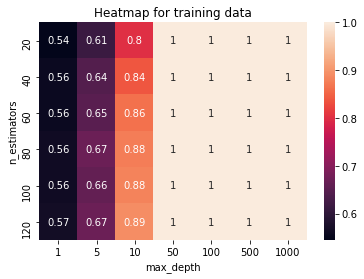

In [230]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

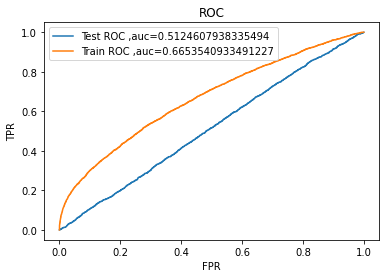

AUC on Test data is 0.5124607938335494
AUC on Train data is 0.6653540933491227
---------------------------


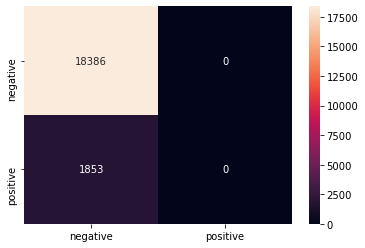

In [231]:
#training our model for max_depth=1000,n_estimators = 120
clf = RandomForestClassifier(max_depth = 5,n_estimators = 100)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# test.csv file prediction

In [192]:
def process_data_ohe(data):
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from sklearn.datasets import make_classification
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import StandardScaler
    SS = StandardScaler()
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    from scipy.sparse import hstack
    
    data['Loan Title'] = data['Loan Title'].str[:3]
    data['Loan Title'] = data['Loan Title'].str.upper()
    
    data.drop(['Loan Status'], axis = 1, inplace = True) 
    data.drop(['ID'], axis=1, inplace=True)
    
    x_train=data
    
    x_train_real_loan_amount = SS.fit_transform(x_train[['Loan Amount']])
    x_train_real_funded_amount = SS.fit_transform(x_train[['Funded Amount']])
    x_train_real_investor = SS.fit_transform(x_train[['Funded Amount Investor']])
    x_train_real_term = SS.fit_transform(x_train[['Term']])
    x_train_real_rate = SS.fit_transform(x_train[['Interest Rate']])
    x_train_real_home = SS.fit_transform(x_train[['Home Ownership']])
    x_train_real_di = SS.fit_transform(x_train[['Debit to Income']])
    x_train_real_dtwoyears = SS.fit_transform(x_train[['Delinquency - two years']])
    x_train_real_ismonths = SS.fit_transform(x_train[['Inquires - six months']])
    x_train_real_oaccount = SS.fit_transform(x_train[['Open Account']])
    x_train_real_precord = SS.fit_transform(x_train[['Public Record']])
    x_train_real_rbalance = SS.fit_transform(x_train[['Revolving Balance']])
    x_train_real_rutilities = SS.fit_transform(x_train[['Revolving Utilities']])
    x_train_real_taccount = SS.fit_transform(x_train[['Total Accounts']])
    x_train_real_trinterest = SS.fit_transform(x_train[['Total Received Interest']])
    x_train_real_trlfee = SS.fit_transform(x_train[['Total Received Late Fee']])
    x_train_real_recover = SS.fit_transform(x_train[['Recoveries']])
    x_train_real_crfee = SS.fit_transform(x_train[['Collection Recovery Fee']])
    x_train_real_medical = SS.fit_transform(x_train[['Collection 12 months Medical']])
    x_train_real_pay = SS.fit_transform(x_train[['Last week Pay']])
    x_train_real_ad = SS.fit_transform(x_train[['Accounts Delinquent']])
    x_train_real_tcamount = SS.fit_transform(x_train[['Total Collection Amount']])
    x_train_real_tcbalance = SS.fit_transform(x_train[['Total Current Balance']])
    x_train_real_trcl = SS.fit_transform(x_train[['Total Revolving Credit Limit']])
    
    real_x_train = np.concatenate((x_train_real_loan_amount,x_train_real_funded_amount,x_train_real_investor,x_train_real_term,
                                x_train_real_rate,x_train_real_home,x_train_real_di,x_train_real_dtwoyears,x_train_real_ismonths,
                                x_train_real_oaccount,x_train_real_precord,x_train_real_rbalance,x_train_real_rutilities,
                                x_train_real_taccount,x_train_real_trinterest,x_train_real_trlfee,x_train_real_recover,
                                x_train_real_crfee,x_train_real_medical,x_train_real_pay,x_train_real_ad,x_train_real_tcamount,
                                x_train_real_tcbalance,x_train_real_trcl),axis = 1)
    

    
    
    
    return real_x_train



In [193]:

real_y_for_test=process_data_ohe(test_data)

In [194]:
ohe.fit(x_train['Batch Enrolled'].values.reshape(-1,1))
batch_train = ohe.transform(test_data['Batch Enrolled'].values.reshape(-1,1))


ohe.fit(x_train['Grade'].values.reshape(-1,1))
grade_train = ohe.transform(test_data['Grade'].values.reshape(-1,1))


ohe.fit(x_train['Sub Grade'].values.reshape(-1,1))
subgrade_train = ohe.transform(test_data['Sub Grade'].values.reshape(-1,1))


ohe.fit(x_train['Employment Duration'].values.reshape(-1,1))
employment_train = ohe.transform(test_data['Employment Duration'].values.reshape(-1,1))


ohe.fit(x_train['Verification Status'].values.reshape(-1,1))
vstatus_train = ohe.transform(test_data['Verification Status'].values.reshape(-1,1))


ohe.fit(x_train['Payment Plan'].values.reshape(-1,1))
pplan_train = ohe.transform(test_data['Payment Plan'].values.reshape(-1,1))


ohe.fit(x_train['Loan Title'].values.reshape(-1,1))
title_train = ohe.transform(test_data['Loan Title'].values.reshape(-1,1))


ohe.fit(x_train['Initial List Status'].values.reshape(-1,1))
ilstatus_train = ohe.transform(test_data['Initial List Status'].values.reshape(-1,1))


ohe.fit(x_train['Application Type'].values.reshape(-1,1))
type_train = ohe.transform(test_data['Application Type'].values.reshape(-1,1))



cat_y_train_new = hstack([batch_train,grade_train,subgrade_train,employment_train,vstatus_train,pplan_train,title_train,ilstatus_train,type_train]).tocsr()

ohe_new_y_train = hstack([cat_y_train_new,real_y_for_test])


In [232]:
# using response coding

rc_x_testcsv.shape

(28913, 42)

In [234]:
new_y_pred=clf.predict(rc_x_testcsv)
new_y_pred_1 = pd.DataFrame(new_y_pred)
new_y_pred_final = new_y_pred_1.rename(columns={0:"Loan Status"})
new_y_pred_final.to_csv('Rc_randomforest.csv', index=False)

In [227]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)